In [1]:
import os
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import DataLoader
from PIL import Image
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder  
%matplotlib inline

In [2]:
data_dir = "../input/plant disease regonition"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
diseases = os.listdir(train_dir)
print(diseases)
print(len(diseases))

['Healthy', 'Powdery', 'Rust']
3


In [3]:
PATH = './plant3_AlexNet_full_no_augment.pth'
model = torch.load(PATH)
model

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU()
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU()
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (13): Flatten(start_dim=1, end_dim=-1)
  (14): Linear(in_features=9216, out_features=2048, bias=True)
  (15): ReLU()
  (16): Dropout(p=0.5, inplace=False)
  (17): Linear(in_features=2048, out_features=512, bias=True)
  (18): ReLU()
  (19): Dropout(p=0.5, inplace=False)
  (20): Linear(in_featur

In [4]:
def predict_image(img, model):
    xb = img.unsqueeze(0).cuda()
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return train.classes[preds[0].item()]

In [5]:
transform= transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

In [6]:
batch_size = 64
train = ImageFolder(train_dir, transform=transform)
valid = ImageFolder(valid_dir, transform=transform) 
train_dl = DataLoader(train, batch_size, shuffle=True, num_workers=0, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, num_workers=0, pin_memory=True)

In [7]:
test_dir = data_dir + "/test"
test = ImageFolder(test_dir, transform=transform)
test_images = sorted(os.listdir(test_dir+"/test"))

In [8]:
dataiter = iter(train_dl)
images, labels = dataiter.next()
classes = ('Healthy', 'Powdery', 'Rust')

C:\Users\Yueqiao\anaconda3\envs\ttorch\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Label: Healthy (1).jpg , Predicted: Powdery


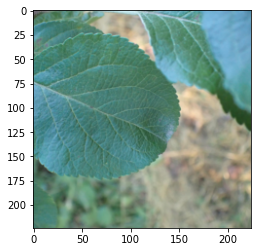

In [9]:
img, label = test[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[0], ', Predicted:', predict_image(img, model))

In [10]:
for i, (img, label) in enumerate(test):
    print('Label:', test_images[i], ', Predicted:', predict_image(img, model), i)

Label: Healthy (1).jpg , Predicted: Powdery 0
Label: Healthy (10).jpg , Predicted: Rust 1
Label: Healthy (11).jpg , Predicted: Healthy 2
Label: Healthy (12).jpg , Predicted: Healthy 3
Label: Healthy (13).jpg , Predicted: Powdery 4
Label: Healthy (14).jpg , Predicted: Healthy 5
Label: Healthy (15).jpg , Predicted: Rust 6
Label: Healthy (16).jpg , Predicted: Healthy 7
Label: Healthy (17).jpg , Predicted: Healthy 8
Label: Healthy (18).jpg , Predicted: Powdery 9
Label: Healthy (19).jpg , Predicted: Healthy 10
Label: Healthy (2).jpg , Predicted: Rust 11
Label: Healthy (20).jpg , Predicted: Healthy 12
Label: Healthy (3).jpg , Predicted: Healthy 13
Label: Healthy (4).jpg , Predicted: Powdery 14
Label: Healthy (5).jpg , Predicted: Rust 15
Label: Healthy (6).jpg , Predicted: Powdery 16
Label: Healthy (7).jpg , Predicted: Powdery 17
Label: Healthy (8).jpg , Predicted: Powdery 18
Label: Healthy (9).jpg , Predicted: Healthy 19
Label: Powdery (1).jpg , Predicted: Powdery 20
Label: Powdery (10).jpg 

In [11]:
List_Loss = [1.0991, 1.0952, 1.0986, 1.1009, 1.0951, 1.0839, 1.0448, 1.1323, 1.0994, 1.0964, 1.0909,1.0908,1.0968,1.0765,1.0112,0.8803,0.7676,0.5]
List_accuracy = [38.09,40.48,38.09,30.95,30.95,28.57,33.33,45.23,69.04,33.33,35.71, 35.714,50.0,42.85, 28.57,61.90, 59.52,54.76, 61.90,50.0]

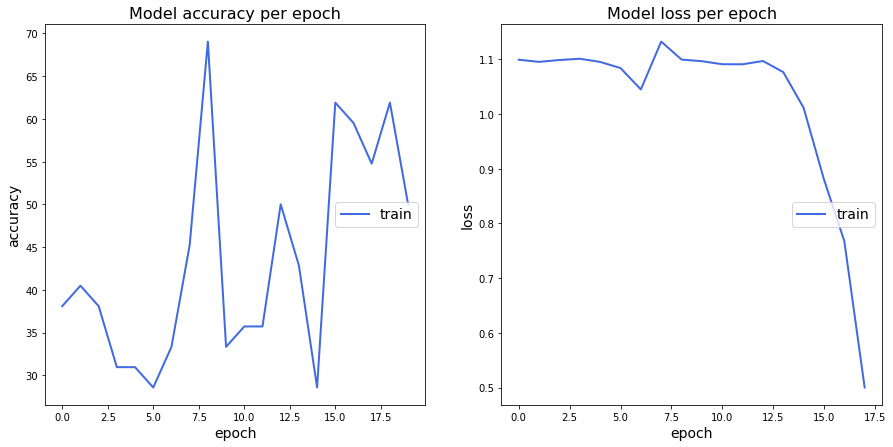

In [12]:
#Train and Valid Accuracy & Loss curve
#-------------------------------------------------------------------------------


#Accuracy curves
#-------------------------------------------------------------------------------
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(List_accuracy,"royalblue",linewidth=2)
plt.title('Model accuracy per epoch',fontsize=16)
plt.ylabel('accuracy',fontsize=14)
plt.xlabel('epoch',fontsize=14)
plt.legend(['train', 'valid'], loc='right',fontsize=14)

#Loss curves
#-------------------------------------------------------------------------------
plt.subplot(122)
plt.plot(List_Loss,"royalblue",linewidth=2)
plt.title('Model loss per epoch',fontsize=16)
plt.ylabel('loss',fontsize=14)
plt.xlabel('epoch',fontsize=14)
plt.legend(['train', 'valid'], loc='right',fontsize=14)
plt.show()

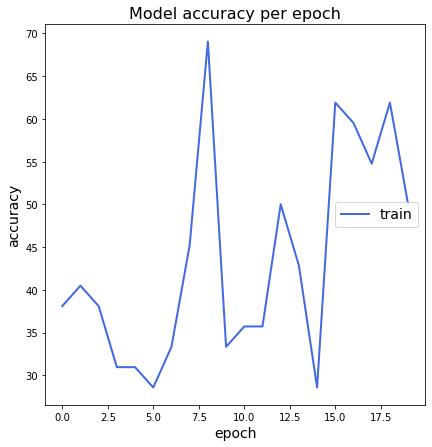

In [13]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(List_accuracy,"royalblue",linewidth=2)
plt.title('Model accuracy per epoch',fontsize=16)
plt.ylabel('accuracy',fontsize=14)
plt.xlabel('epoch',fontsize=14)
plt.legend(['train', 'valid'], loc='right',fontsize=14)